## How it works...
In the context of neural networks, the single perceptrons look like this:

![mlp_function](../images/dl_mlp1.png)

The output is a function of a sum of the dot product of weights and inputs. The function f is the activation function and can be a sigmoid curve, for example. In the neural network, hyperparameter activation refers to this function. In scikit-learn, there are the options of identity, logistic, tanh, and relu, where logistic is the sigmoid curve.

The whole network looks like this (the following is a diagram from the scikit documentation at http://scikit-learn.org/stable/modules/neural_networks_supervised.html):

![mlp_function](../images/dl_mlp2.png)


### Philosophical thoughts on neural networks

Neural networks are mathematically universal function approximators and can learn any function. Also, the hidden layers are often interpreted as the network learning the intermediate steps of a process without a human having to program the intermediate steps. This can come from convolutional neural networks in computer vision, where it is easy to see how the neural network figures out each layer.

These facts make an interesting mental image and can be applied to other estimators. Many people do not tend to think of random forests as trees figuring out processes tree level by tree level, or tree by tree (perhaps because their structure is not as organized and random forests do not invoke visualizations of the biological brain). In more practical detail, if you wanted to organize random forests, you can limit their depth or perhaps use gradient boosting machines.

Regardless of the hard facts present or not in the idea of a neural network truly being intelligent, it is helpful to carry around such mental images as the field progresses and machines become smarter and smarter. Carry the idea around, yet focus on the results as they are; that's what machine learning is about now.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

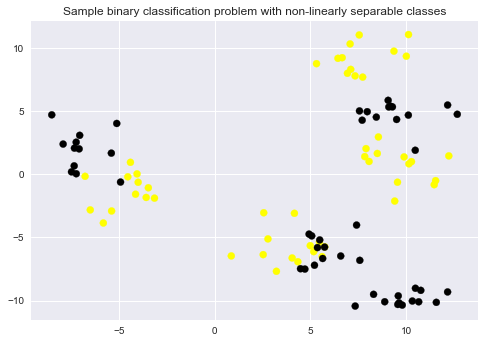

In [2]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

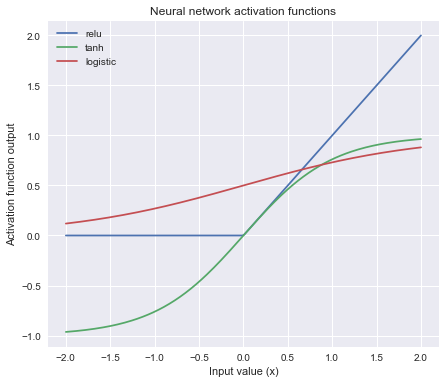

In [3]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

Synthetic dataset 1: single hidden layer

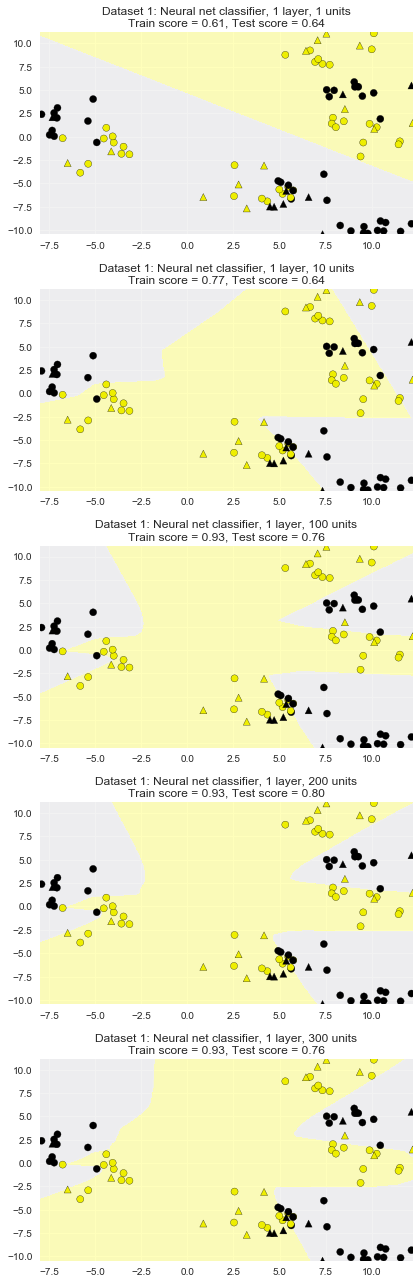

In [7]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(5, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100, 200, 300], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfga',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Synthetic dataset 1: two hidden layers

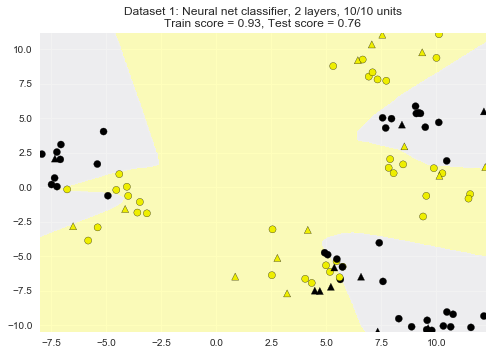

In [9]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [100, 100, 100], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

### Regularization parameter: alpha

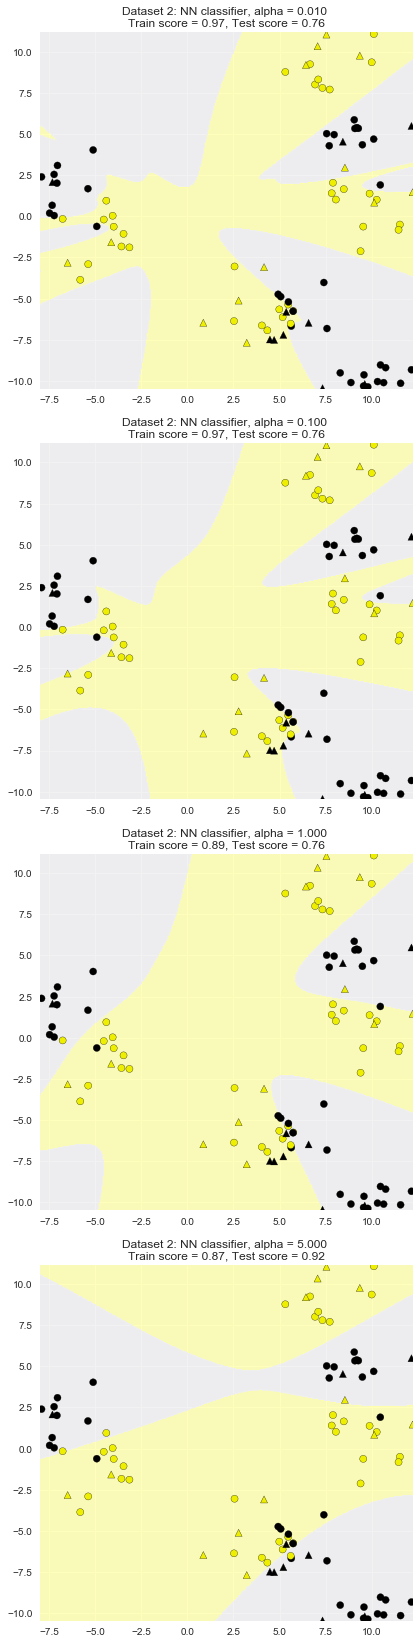

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### The effect of different choices of activation function

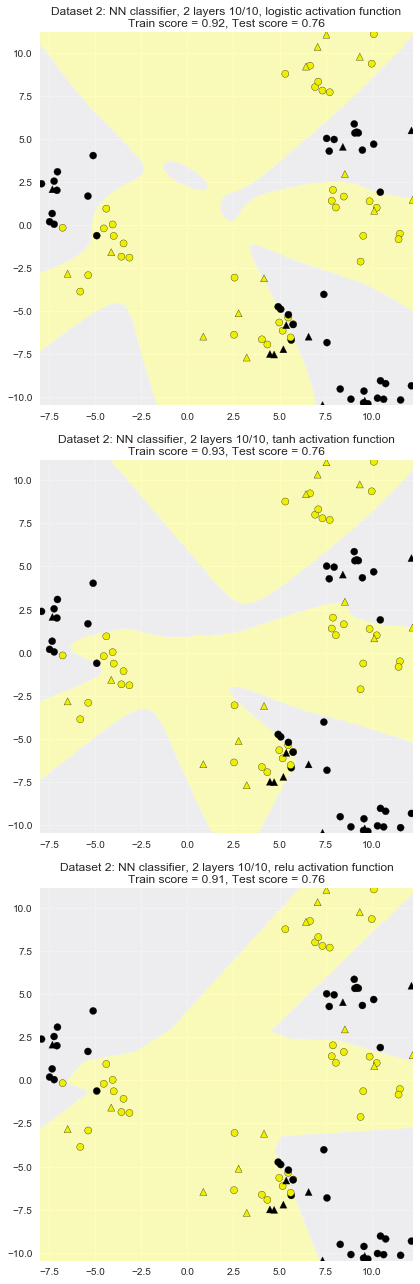

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Neural Networks: Regression

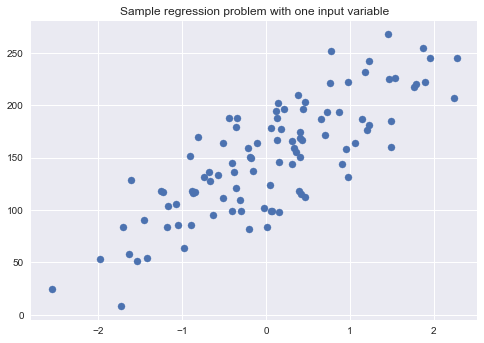

In [12]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

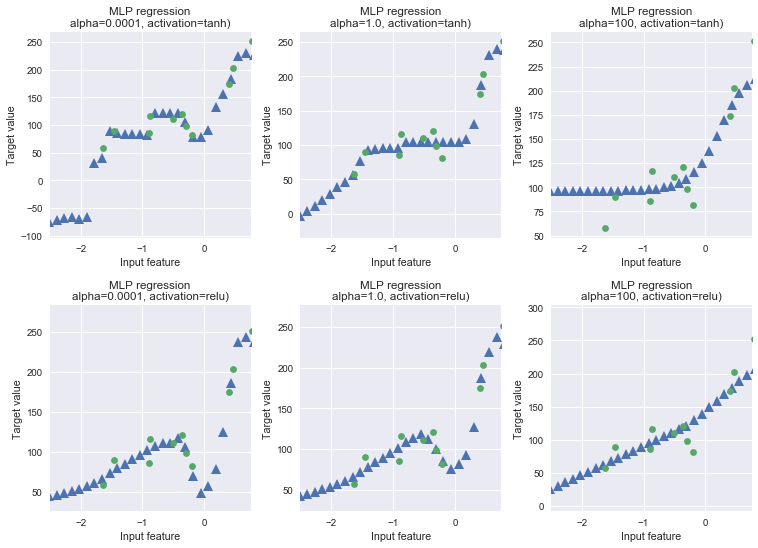

In [13]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

### Application to real-world dataset for classification

In [14]:
# Breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


## Using wine_data.csv

In [16]:
import pandas as pd

wine = pd.read_csv('../Data/wine_data.csv', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
wine.columns = ['Class','Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315','Proline']

In [21]:
X = wine.drop(['Class'], axis=1).values
y = wine['Class']

In [22]:
print(X.shape,y.shape)

(178, 13) (178,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [46]:
#using linear regression
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train, y_train)
print('R-squared score (training): {:.4f}'.format(regr.score(X_train, y_train)))
print('R-squared score (test): {:.4f}'.format(regr.score(X_test, y_test)))

R-squared score (training): 0.9185
R-squared score (test): 0.8044


In [27]:
#normalized using standardscaler for certain method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.fit_transform(X_test)

In [42]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

lgreg = LogisticRegression(C=5).fit(X_train_norm, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'.format(lgreg.score(X_train_norm, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'.format(lgreg.score(X_test_norm, y_test)))

Accuracy of Logistic regression classifier on training set: 1.0000
Accuracy of Logistic regression classifier on test set: 0.9778


In [31]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train_norm, y_train)
print('Accuracy of KNN classifier on training set: {:.4f}'.format(knn.score(X_train_norm, y_train)))
print('Accuracy of KNN classifier on test set: {:.4f}'.format(knn.score(X_test_norm, y_test)))

Accuracy of KNN classifier on training set: 0.9774
Accuracy of KNN classifier on test set: 0.9556


In [37]:
#using neural net MLP Regression
from sklearn.neural_network import MLPRegressor
mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'tanh',alpha = 1.0,solver = 'lbfgs').fit(X_train_norm, y_train)

print('Accuracy of MLP Regression on training set: {:.4f}'.format(mlpreg.score(X_train_norm, y_train)))
print('Accuracy of MLP Regression on test set: {:.4f}'.format(mlpreg.score(X_test_norm, y_test)))

Accuracy of MLP Regression on training set: 0.9841
Accuracy of MLP Regression on test set: 0.9219


In [47]:
#using neural net MLP Classifier
from sklearn.neural_network import MLPClassifier

mlpcls = MLPClassifier(hidden_layer_sizes = [100,100], alpha = .87,
                   random_state = 0, solver='lbfgs').fit(X_train_norm, y_train)

print('Accuracy of MLP Regression on training set: {:.4f}'.format(mlpcls.score(X_train_norm, y_train)))
print('Accuracy of MLP Regression on test set: {:.4f}'.format(mlpcls.score(X_test_norm, y_test)))

Accuracy of MLP Regression on training set: 1.0000
Accuracy of MLP Regression on test set: 0.9778


In [44]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features = 10, random_state = 0).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.4f}'.format(rfc.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rfc.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.9925
Accuracy of RF classifier on test set: 0.9556


In [45]:
#using gradient boost
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.4f}'.format(gbc.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(gbc.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.0000
Accuracy of RF classifier on test set: 0.9556


In [34]:
#normalized using standardscaler for certain method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale  = scaler.fit_transform(X_test)

In [41]:
#using neural net MLP Classifier
from sklearn.neural_network import MLPClassifier

mlpcls = MLPClassifier(hidden_layer_sizes = [100, 100,100], alpha = 1.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scale, y_train)

print('Accuracy of MLP Regression on training set: {:.4f}'.format(mlpcls.score(X_train_scale, y_train)))
print('Accuracy of MLP Regression on test set: {:.4f}'.format(mlpcls.score(X_test_scale, y_test)))

Accuracy of MLP Regression on training set: 1.0000
Accuracy of MLP Regression on test set: 0.9778


In [48]:
mlpcls.predict_proba

<bound method MLPClassifier.predict_proba of MLPClassifier(activation='relu', alpha=0.87, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)>